In [2]:
#필요 라이브러리 임포트
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['axes.unicode_minus'] = False

import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~~')

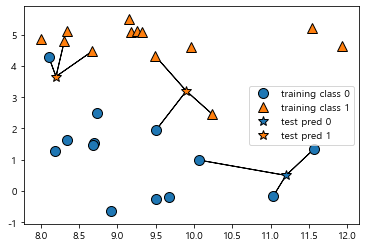

In [6]:
mglearn.plots.plot_knn_classification(n_neighbors=3) # n_neighbors : 이웃의 갯수

In [7]:
# k-NN 모델 만들기
# fit : (X_train, y_train) => 훈련
# predict : ( X ) => 예측하기
# score : (x,y) => 점수 (predict의 평균)

# train_test_split : 섞고 잘라서 훈련용, 테스트용 데이터셋을 생성
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
# k-NN 모델 준비
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3) # 이웃의 갯수를 3개 갖는 모델 생성

clf.fit(X_train, y_train) # 훈련하기

print("테스트 세트 예측: {}".format(clf.predict(X_test)))
print("실제 값 : {}".format(y_test))
print()
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]
실제 값 : [1 0 1 0 1 1 0]

테스트 세트 정확도: 0.86


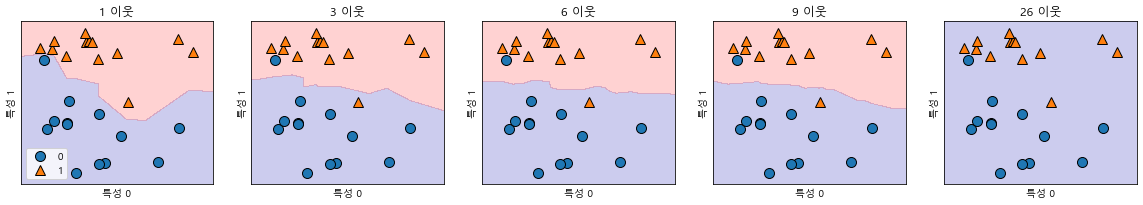

In [16]:
fig, axes = plt.subplots(1, 5, figsize=(20,3))

for n_neighbors, ax in zip([1,3,6,9,26], axes):
    # fit 메서드는 self 반환을 하기 때문에 객체 생성과 메서드를 한줄에 사용 할 수 있습니다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=.5, ax=ax, alpha=.2)
    mglearn.discrete_scatter(X[:,0], X[:,1],y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
axes[0].legend(loc=3)

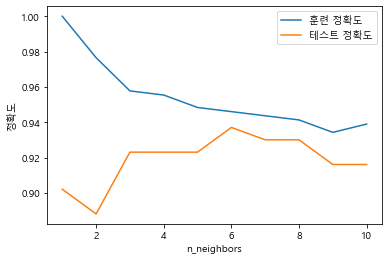

In [20]:
#유방암 데이터 불러오기
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() 

# 섞어서 자르기
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, # 데이터가 한쪽으로 편중되지 않도록
                                                    random_state=66) # 테스트 세트와 훈련 세트 분할

# 훈련, 테스트 점수 기록
# => epoch
training_accuracy = [] # 각 이웃 개수 별 훈련 세트에 대한 정확도를 저장할 리스트
test_accuracy = [] # 각 이웃 개수 별 테스트 세트에 대한 정확도를 저장할 리스트

#이웃의 개수 설정 (1개 ~ 10개 까지)
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    #모델 생성하기
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    #훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    #일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도") # 이웃 개수에 대한 훈련 세트 정확도 선 그래프 그리기
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도") # 이웃 개수에 대한 테스트 세트 정확도 선 그래프 그리기
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

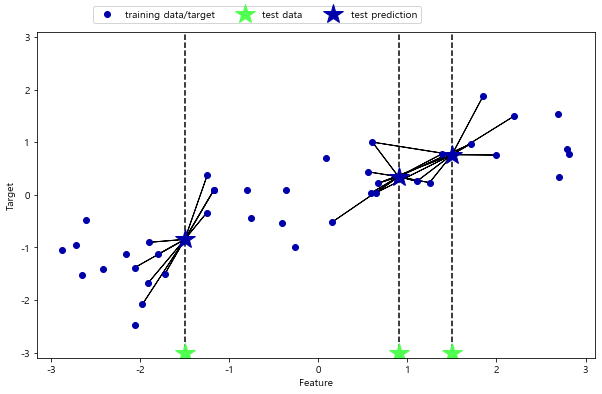

In [23]:
# k-NN 회귀
mglearn.plots.plot_knn_regression(n_neighbors=10)

In [24]:
from sklearn.neighbors import KNeighborsRegressor # k-NN 회귀를 위한 KNeighborsRegressor 임포트

X, y = mglearn.datasets.make_wave(n_samples=40)

#wave 데이터셋을 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델 객체 생성하기
reg = KNeighborsRegressor(n_neighbors = 3)

# 훈련 데이터와 타깃을 사용하여 모델 학습 시키기
reg.fit(X_train, y_train)

print("테스트 세트 예측 :\n{}".format(reg.predict(X_test)))

테스트 세트 예측 :
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


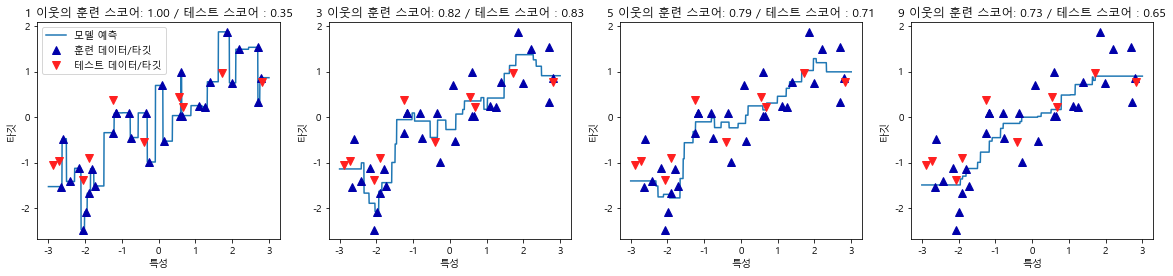

In [25]:
fig, axes = plt.subplots(1,4, figsize=(20,4))
#-3과 3 사이에 1000개의 데이터 만들기 -> 테스트 용도로 사용함
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1,3,5,9], axes):
    # 이웃의 개수를 1,3,9로 하여 예측하는 모델을 만듭니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line)) # 테스트 용도로 만든 데이터를 예측하고 예측 결과를 선으로 표현합니다.
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8) # 훈련 데이터를 그래프에 표시합니다.
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)   # 테스트 데이터를 그래프에 표시합니다.
    
    # 훈련 데이터의 점수와 테스트 데이터의 점수를 제목에 표현합니다.
    ax.set_title("{} 이웃의 훈련 스코어: {:.2f} / 테스트 스코어 : {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")

axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")